In [10]:
library(repr)
options(repr.plot.width = 5, repr.plot.height = 4)
options(repr.plot.res = 200)

library(ggplot2)
library(dplyr)

set.seed(1)


In [11]:
f_xy <- function(x, y) 6 * (x - y)^2
f_y <- function(y) 6 * (y^2 - y + 1 / 3)
f_x_y <- function(x, y) f_xy(x, y) / f_y(y)

xy <- seq(0, 1, 0.01)


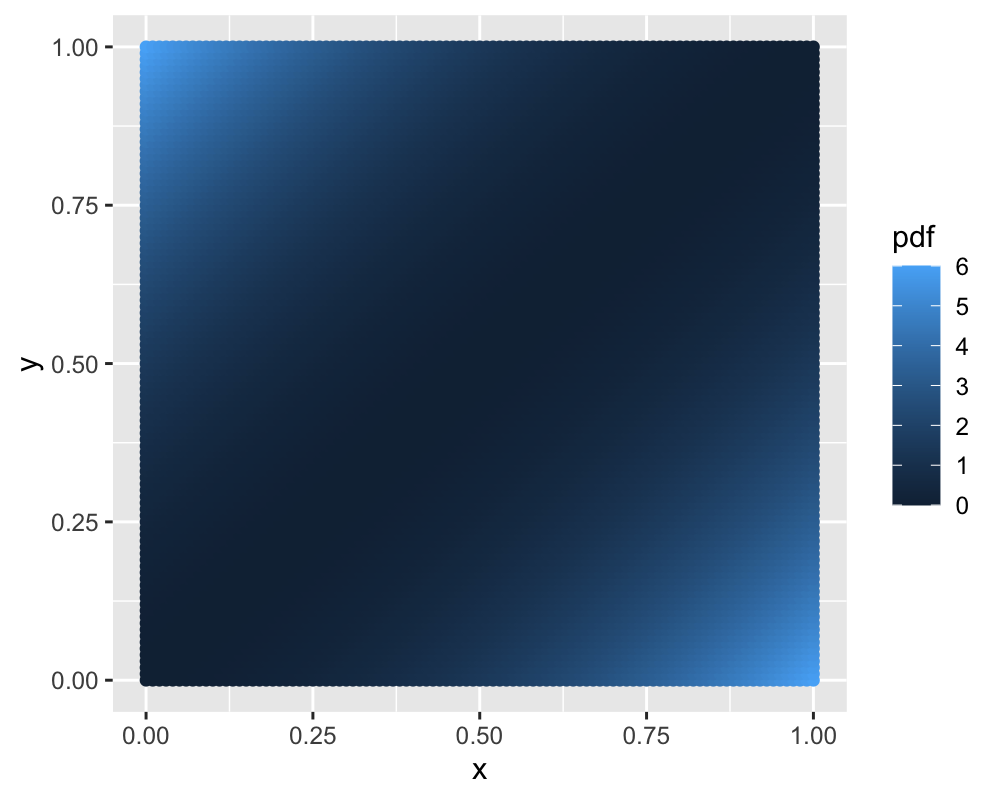

In [12]:
expand.grid(x = xy, y = xy) |>
  mutate(pdf = f_xy(x, y)) |>
  ggplot(aes(x = x, y = y, color = pdf)) +
  geom_point()


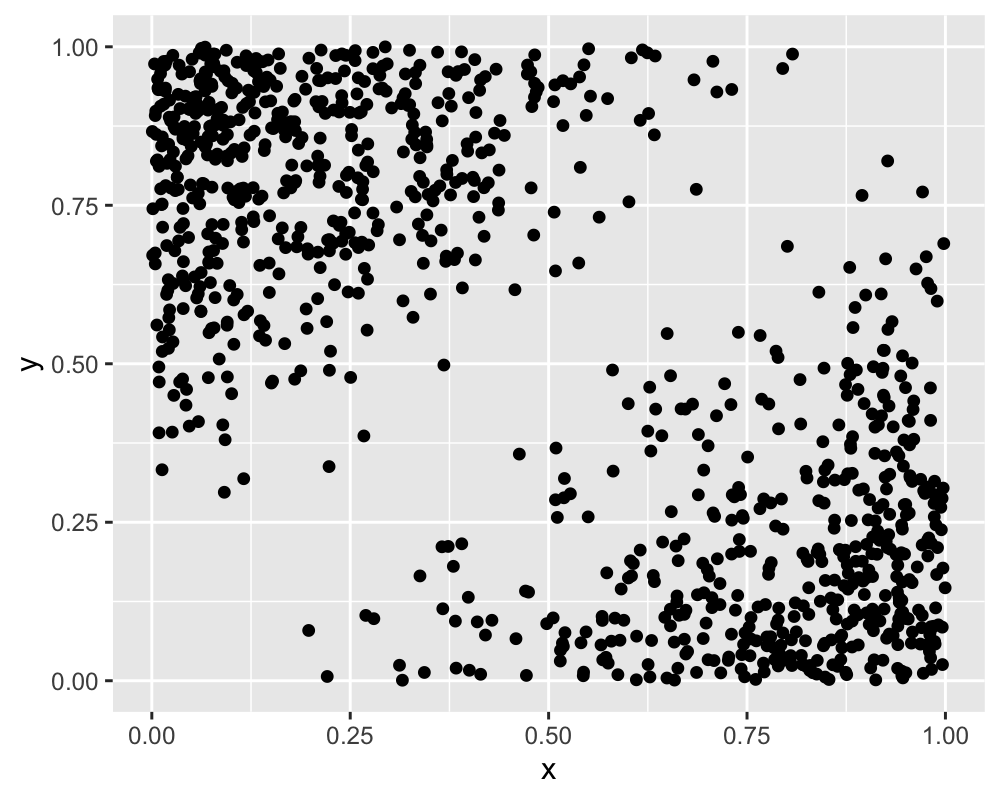

In [13]:
samples <- matrix(nrow = 1000, ncol = 2)
i <- 1

while (i <= dim(samples)[1]) {
  # Proposed sample
  x_y <- runif(2, 0, 1)

  # Sample from uniform up to envelope (max is 6 in this case)
  u <- runif(1, 0, 6)

  # Accept or reject
  if (u < do.call(f_xy, as.list(x_y))) {
    samples[i, ] <- x_y
    i <- i + 1
  }
}

data.frame(data = samples) |>
  rename(x = 1, y = 2) |>
  ggplot(aes(x = x, y = y)) +
  geom_point()


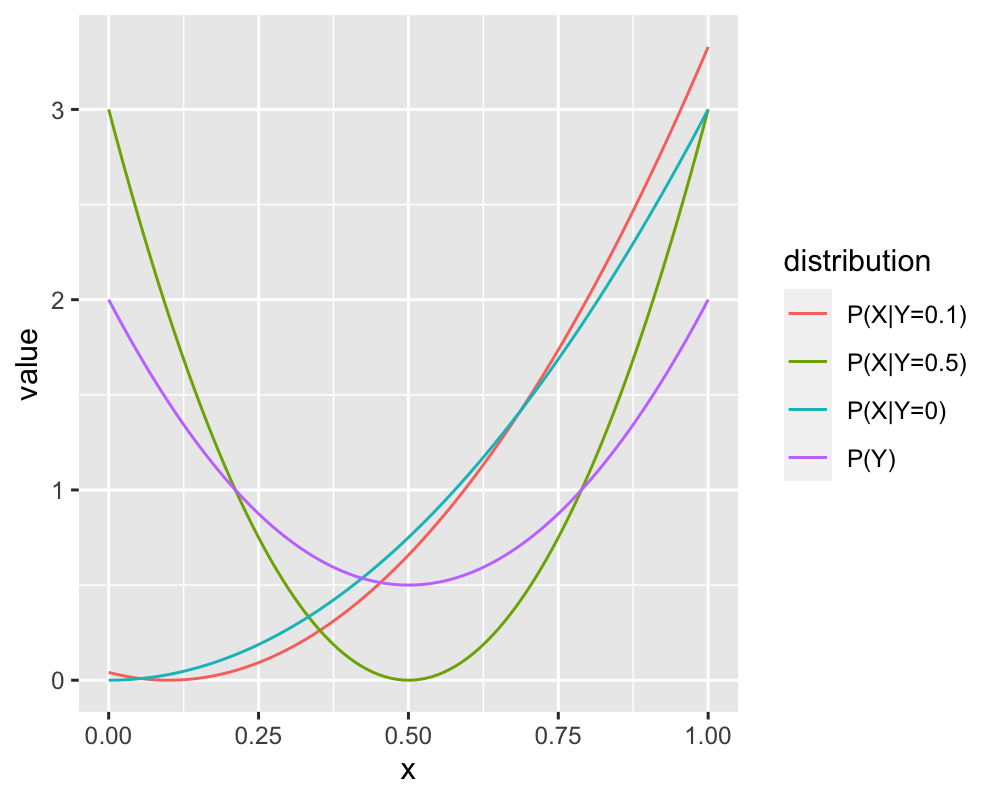

In [14]:
bind_rows(
  data.frame(x = xy, value = f_y(xy), distribution = "P(Y)"),
  data.frame(x = xy, value = f_x_y(xy, 0), distribution = "P(X|Y=0)"),
  data.frame(x = xy, value = f_x_y(xy, 0.1), distribution = "P(X|Y=0.1)"),
  data.frame(x = xy, value = f_x_y(xy, 0.5), distribution = "P(X|Y=0.5)"),
) |>
  ggplot(aes(x = x, y = value, color = distribution)) +
  geom_line()
